In [724]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [725]:
data = pd.read_csv('salary.csv')
threshold = 0.05 * len(data)
data_drop = data.columns[data.isna().sum() < threshold]
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


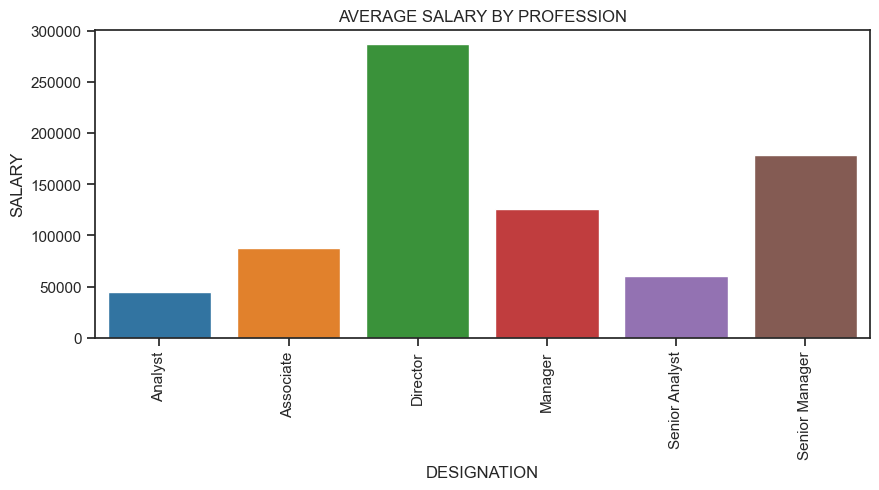

In [726]:
mean_salary = data.groupby('DESIGNATION')[['SALARY']].mean().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x=mean_salary['DESIGNATION'],y=mean_salary['SALARY'])
plt.xticks(rotation=90)
plt.title('AVERAGE SALARY BY PROFESSION')
plt.show()

<Figure size 1000x1000 with 0 Axes>

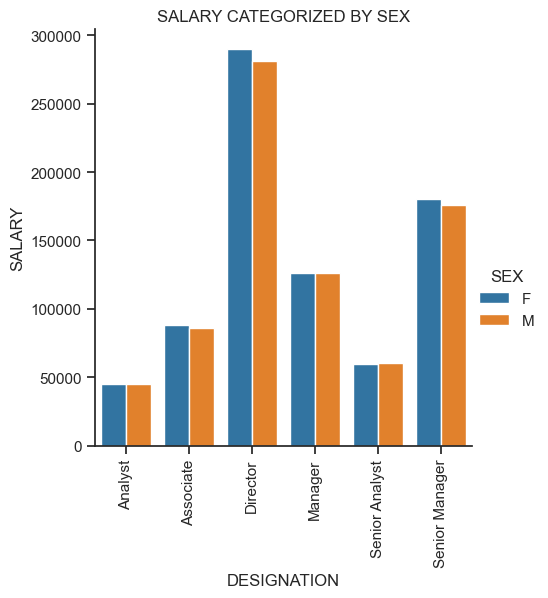

In [727]:
# gender wise salary 
gender_salary = data.groupby(['DESIGNATION','SEX'])[['SALARY']].mean().reset_index()

plt.figure(figsize=(10,10))
sns.catplot(x='DESIGNATION',y='SALARY',hue='SEX',data=gender_salary,kind='bar')
sns.set_style('darkgrid')
sns.set_style('ticks')
plt.xticks(rotation=90)
sns.set_context
plt.title('SALARY CATEGORIZED BY SEX')
plt.show()

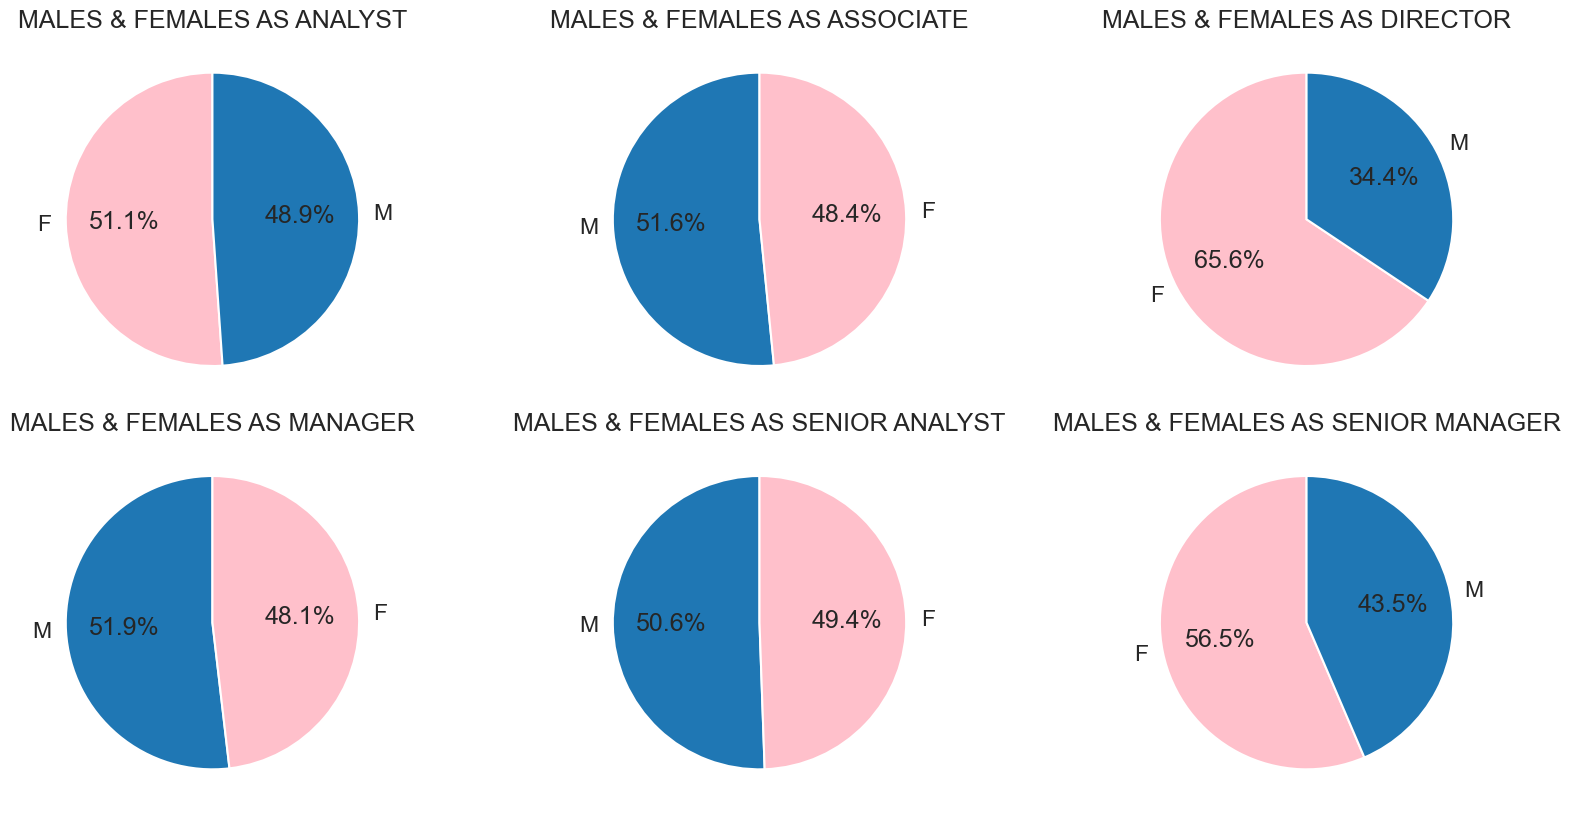

In [728]:
# gender %
gender_count = data.groupby('DESIGNATION')[['SEX']].value_counts().reset_index(name='count')
analyst = gender_count[gender_count['DESIGNATION'] == 'Analyst']
associate = gender_count[gender_count['DESIGNATION'] == 'Associate']
director = gender_count[gender_count['DESIGNATION'] == 'Director']
manager = gender_count[gender_count['DESIGNATION'] == 'Manager']
s_analyst = gender_count[gender_count['DESIGNATION'] == 'Senior Analyst']
s_manager = gender_count[gender_count['DESIGNATION'] == 'Senior Manager']

color = {'M': '#1f77b4', 'F': 'pink'}

fig,((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.set_context('talk')
plt.subplots_adjust(hspace=.1)
ax0.pie(analyst['count'],labels=analyst['SEX'],autopct='%1.1f%%', startangle=90,colors=analyst['SEX'].map(color))
ax0.set(title='MALES & FEMALES AS ANALYST')

ax1.pie(associate['count'],labels=associate['SEX'],autopct='%1.1f%%', startangle=90,colors=associate['SEX'].map(color))
ax1.set(title='MALES & FEMALES AS ASSOCIATE')

ax2.pie(director['count'],labels=director['SEX'],autopct='%1.1f%%', startangle=90,colors=director['SEX'].map(color))
ax2.set(title='MALES & FEMALES AS DIRECTOR')

ax3.pie(manager['count'],labels=manager['SEX'],autopct='%1.1f%%', startangle=90,colors=manager['SEX'].map(color))
ax3.set(title='MALES & FEMALES AS MANAGER')

ax4.pie(s_analyst['count'],labels=s_analyst['SEX'],autopct='%1.1f%%', startangle=90,colors=s_analyst['SEX'].map(color))
ax4.set(title='MALES & FEMALES AS SENIOR ANALYST')

ax5.pie(s_manager['count'],labels=s_manager['SEX'],autopct='%1.1f%%', startangle=90,colors=s_manager['SEX'].map(color))
ax5.set(title='MALES & FEMALES AS SENIOR MANAGER')
plt.show()

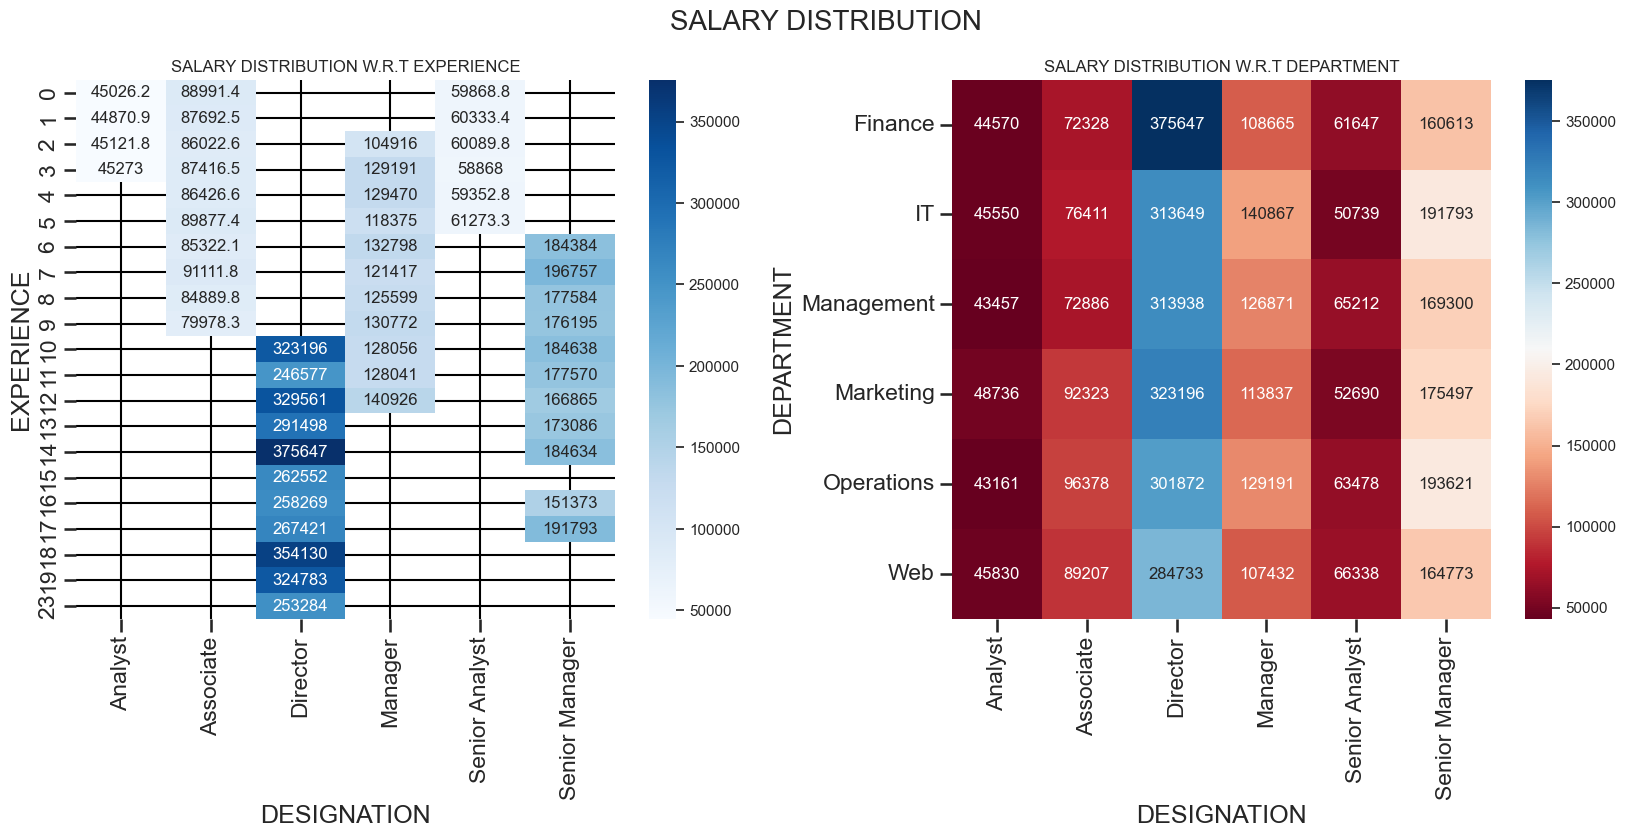

In [729]:
# relation of salary with experience and department
exp_salary= data.groupby(['DESIGNATION','PAST EXP'])['SALARY'].mean().reset_index()
unit_salary = data.groupby(['UNIT','DESIGNATION'])[['SALARY']].first().reset_index()

pivot_exp = exp_salary.pivot(index='PAST EXP',columns='DESIGNATION',values='SALARY')
pivot_unit = unit_salary.pivot(index='UNIT',columns='DESIGNATION',values='SALARY')

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.set_context('notebook')
plt.subplots_adjust(wspace=.3)

sns.heatmap(pivot_exp,annot=True,fmt='g',cmap='Blues',ax=ax0)
# sns.set_style('darkgrid')
sns.set_style('ticks')
ax0.set(title='SALARY DISTRIBUTION W.R.T EXPERIENCE')
ax0.set(ylabel='EXPERIENCE')
ax0.grid(True,color='black')

sns.heatmap(pivot_unit,annot=True,fmt='g',cmap='RdBu',ax=ax1)
sns.set_style('ticks')
ax1.set(title='SALARY DISTRIBUTION W.R.T DEPARTMENT')
ax1.set(ylabel='DEPARTMENT')

plt.suptitle('SALARY DISTRIBUTION',fontsize=20)
plt.show()

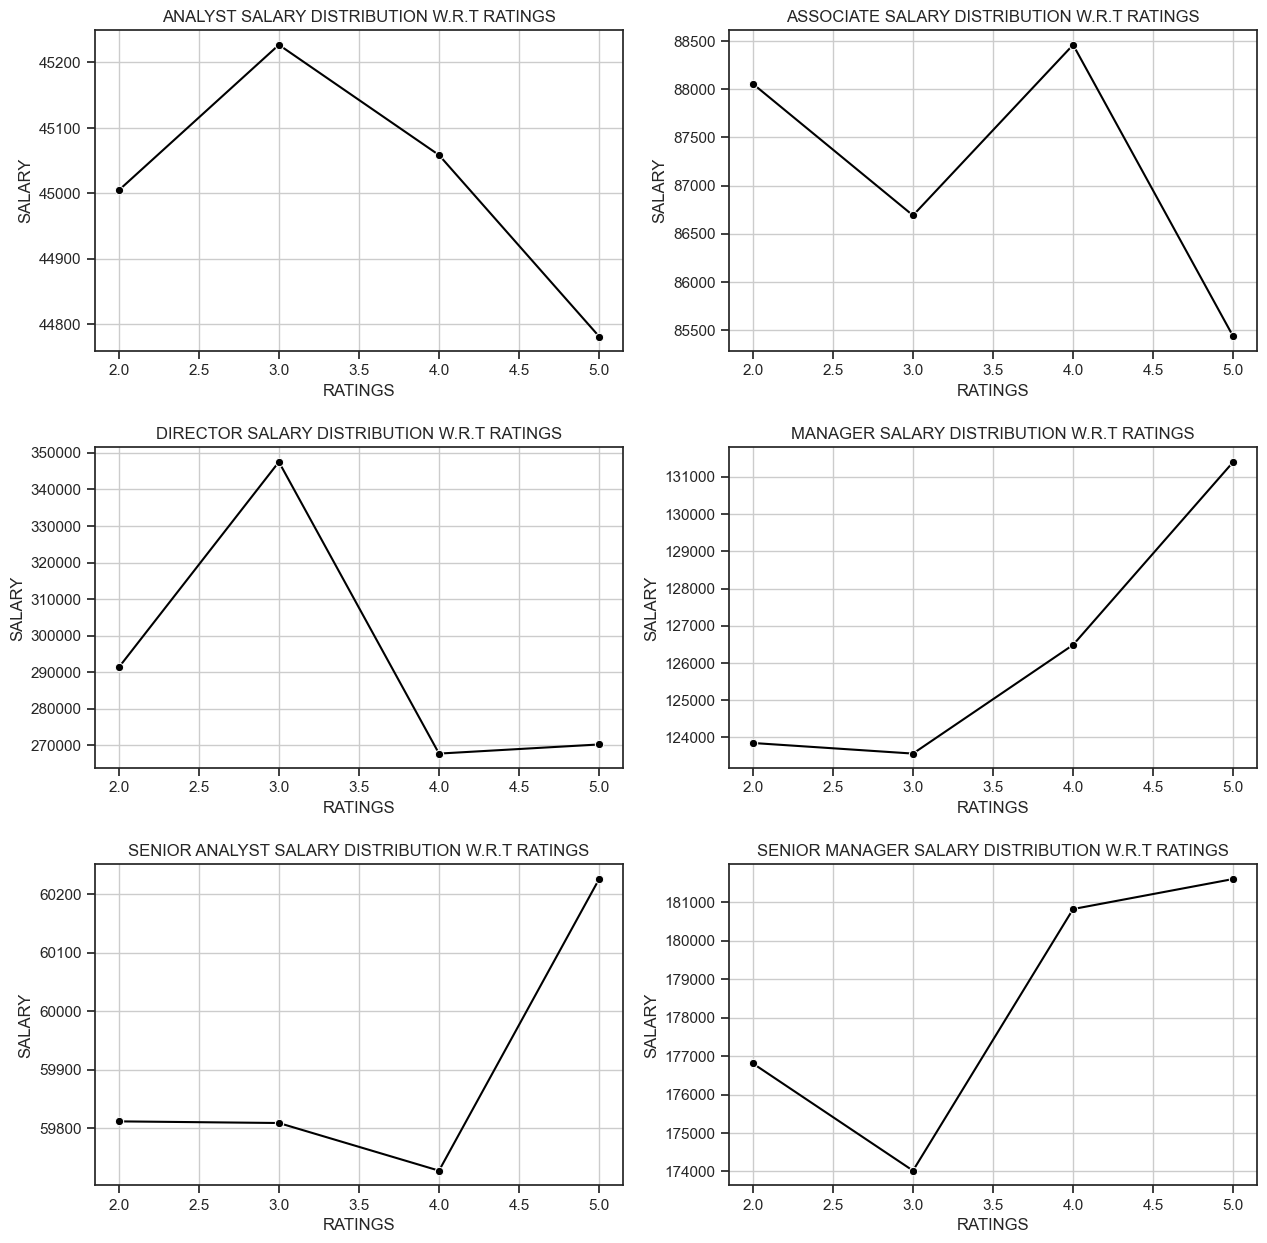

In [730]:
# salary and rating relation
rating = data.groupby(['DESIGNATION','RATINGS'])[['SALARY']].mean().reset_index()

analyst = rating[rating['DESIGNATION'] == 'Analyst']
associate = rating[rating['DESIGNATION'] == 'Associate']
director = rating[rating['DESIGNATION'] == 'Director']
manager = rating[rating['DESIGNATION'] == 'Manager']
s_analyst = rating[rating['DESIGNATION'] == 'Senior Analyst']
s_manager = rating[rating['DESIGNATION'] == 'Senior Manager']

fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sns.set_context('notebook')
plt.subplots_adjust(hspace=.3)

sns.lineplot(x=analyst['RATINGS'],y=analyst['SALARY'],marker='o',color='black',ax=ax0)
ax0.grid(True)
ax0.set(title='ANALYST SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=associate['RATINGS'],y=associate['SALARY'],marker='o',color='black',ax=ax1)
ax1.grid(True)
ax1.set(title='ASSOCIATE SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=director['RATINGS'],y=director['SALARY'],marker='o',color='black',ax=ax2)
ax2.grid(True)
ax2.set(title='DIRECTOR SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=manager['RATINGS'],y=manager['SALARY'],marker='o',color='black',ax=ax3)
ax3.grid(True)
ax3.set(title='MANAGER SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=s_analyst['RATINGS'],y=s_analyst['SALARY'],marker='o',color='black',ax=ax4)
ax4.grid(True)
ax4.set(title='SENIOR ANALYST SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=s_manager['RATINGS'],y=s_manager['SALARY'],marker='o',color='black',ax=ax5)
ax5.grid(True)
ax5.set(title='SENIOR MANAGER SALARY DISTRIBUTION W.R.T RATINGS')
plt.show()

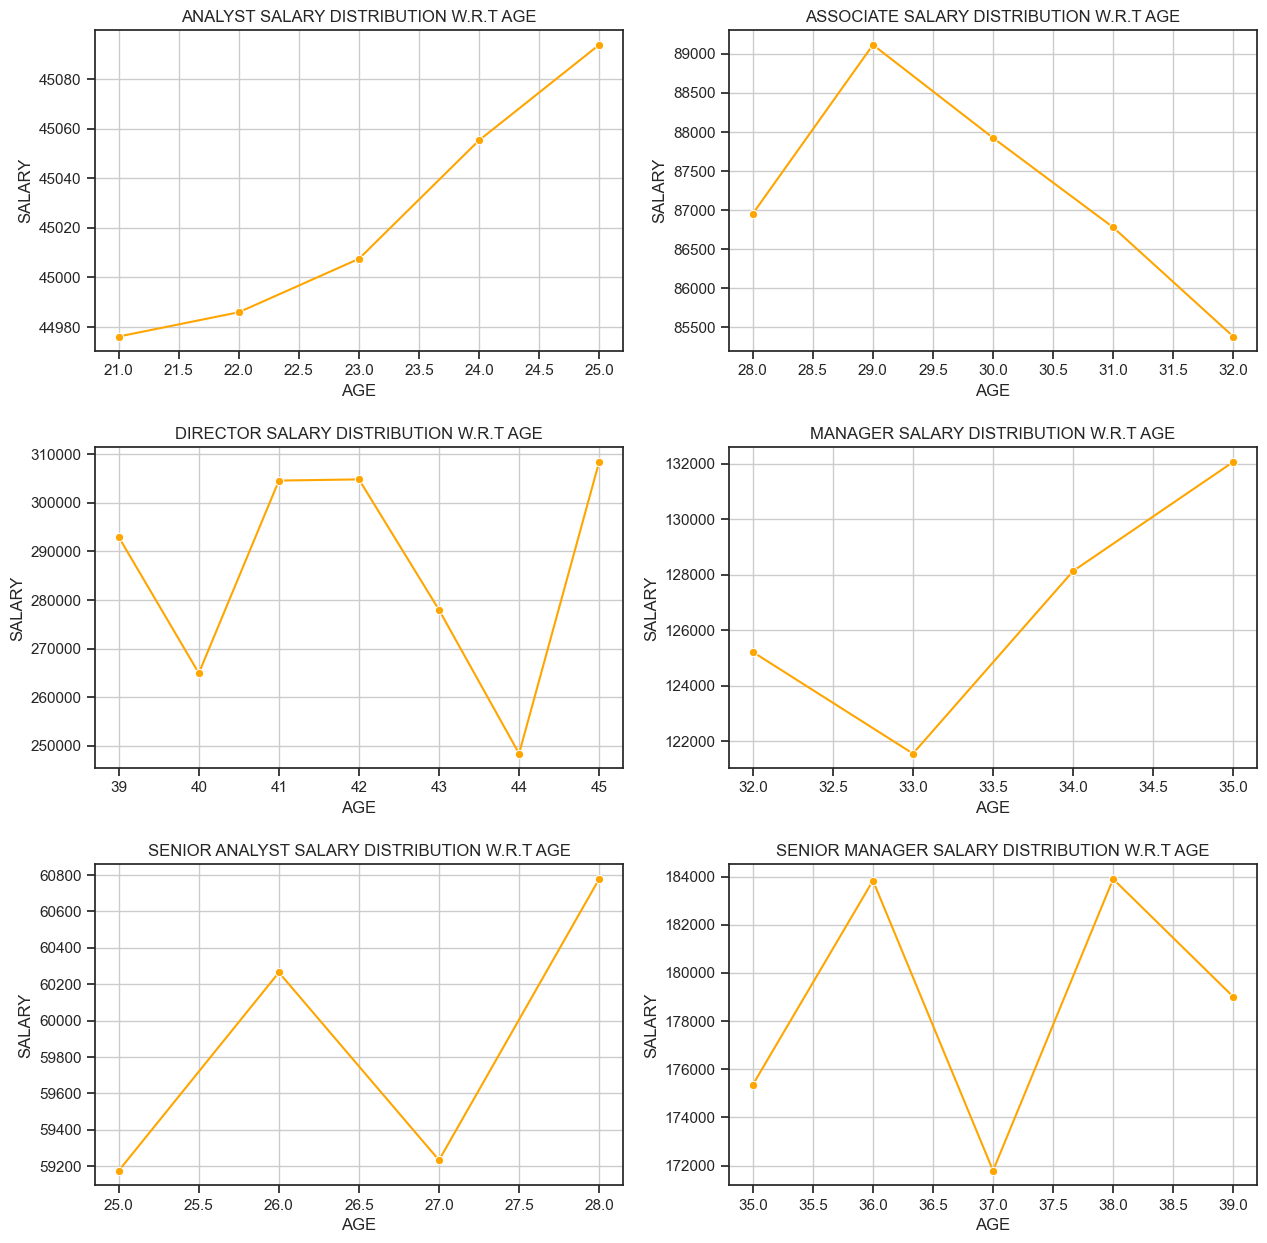

In [731]:
# time trends wit respect to age
age_salary = data.groupby(['DESIGNATION','AGE'])[['SALARY']].mean().reset_index()
analyst = age_salary[age_salary['DESIGNATION'] == 'Analyst']
associate = age_salary[age_salary['DESIGNATION'] == 'Associate']
director = age_salary[age_salary['DESIGNATION'] == 'Director']
manager = age_salary[age_salary['DESIGNATION'] == 'Manager']
s_analyst = age_salary[age_salary['DESIGNATION'] == 'Senior Analyst']
s_manager = age_salary[age_salary['DESIGNATION'] == 'Senior Manager']

fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sns.set_context('notebook')
plt.subplots_adjust(hspace=.3)

sns.lineplot(x=analyst['AGE'],y=analyst['SALARY'],marker='o',color='orange',ax=ax0)
ax0.grid(True)
ax0.set(title='ANALYST SALARY DISTRIBUTION W.R.T AGE')

sns.lineplot(x=associate['AGE'],y=associate['SALARY'],marker='o',color='orange',ax=ax1)
ax1.grid(True)
ax1.set(title='ASSOCIATE SALARY DISTRIBUTION W.R.T AGE')

sns.lineplot(x=director['AGE'],y=director['SALARY'],marker='o',color='orange',ax=ax2)
ax2.grid(True)
ax2.set(title='DIRECTOR SALARY DISTRIBUTION W.R.T AGE')

sns.lineplot(x=manager['AGE'],y=manager['SALARY'],marker='o',color='orange',ax=ax3)
ax3.grid(True)
ax3.set(title='MANAGER SALARY DISTRIBUTION W.R.T AGE')

sns.lineplot(x=s_analyst['AGE'],y=s_analyst['SALARY'],marker='o',color='orange',ax=ax4)
ax4.grid(True)
ax4.set(title='SENIOR ANALYST SALARY DISTRIBUTION W.R.T AGE')

sns.lineplot(x=s_manager['AGE'],y=s_manager['SALARY'],marker='o',color='orange',ax=ax5)
ax5.grid(True)
ax5.set(title='SENIOR MANAGER SALARY DISTRIBUTION W.R.T AGE')
plt.show()

In [732]:
# missing values 
threshold = 0.05 * len(data)
columns = data.columns[data.isna().sum() < threshold]
data = data.dropna().reset_index(drop=True)

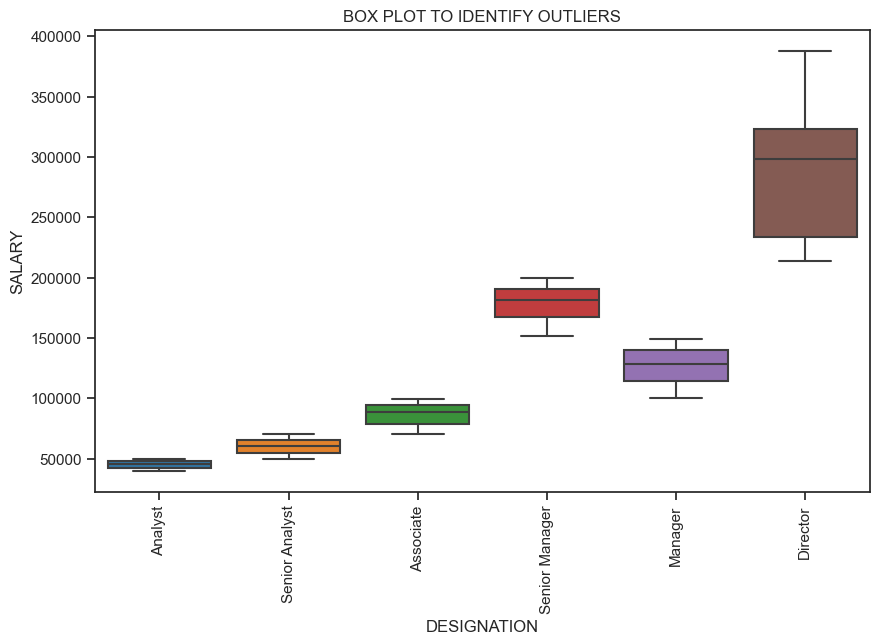

In [733]:
# outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['DESIGNATION'],y=data['SALARY'])
plt.title('BOX PLOT TO IDENTIFY OUTLIERS')
plt.xticks(rotation=90)
plt.show()

In [734]:
# SEX, DESIGNATION, AGE, SALARY, UNIT, RATINGS, PAST EXP
# encoding
model_data = data[['SEX','DESIGNATION','AGE','UNIT','RATINGS','PAST EXP','SALARY']]
model_data = model_data.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
model_data.columns = model_data.columns.str.lower()
sex = {'m':1,'f':0}
model_data.loc[:, 'sex'] = model_data['sex'].map(sex)
designation = {'analyst':0,'associate':1,'manager':2,'director':3,'senior analyst':4,'senior manager':5}
model_data.loc[:, 'designation'] = model_data['designation'].map(designation)
unit = {'it':0,'finance':1,'operations':2,'marketing':3,'web':4,'management':5}
model_data.loc[:, 'unit'] = model_data['unit'].map(unit)

C:\Users\hp\AppData\Local\Temp\ipykernel_17300\682035352.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model_data.loc[:, 'sex'] = model_data['sex'].map(sex)
C:\Users\hp\AppData\Local\Temp\ipykernel_17300\682035352.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model_data.loc[:, 'designation'] = model_data['designation'].map(designation)
C:\Users\hp\AppData\Local\Temp\ipykernel_17300\682035352.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting 

In [735]:
model_data.head()

,sex,designation,age,unit,ratings,past exp,salary
0,0,0,21.0,1,2.0,0,44570
1,0,0,21.0,1,3.0,0,40955
2,0,0,22.0,0,3.0,0,45550
3,1,0,22.0,3,5.0,0,40339
4,0,4,28.0,2,3.0,1,63478


In [736]:
X = model_data.drop('salary',axis=1).values
y = model_data['salary'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

# gridsearch for lasso alpha
lasso = Lasso()
param = {'alpha':np.arange(1,101)}
gcvs = GridSearchCV(lasso,param,cv=5,scoring='neg_mean_squared_error')
gcvs.fit(X_train,y_train)
print(f'best paramter to use : {gcvs.best_params_}')
print(f'best score for the paramter : {gcvs.best_score_}')

best paramter to use : {'alpha': 100}
best score for the paramter : -307860233.0843971


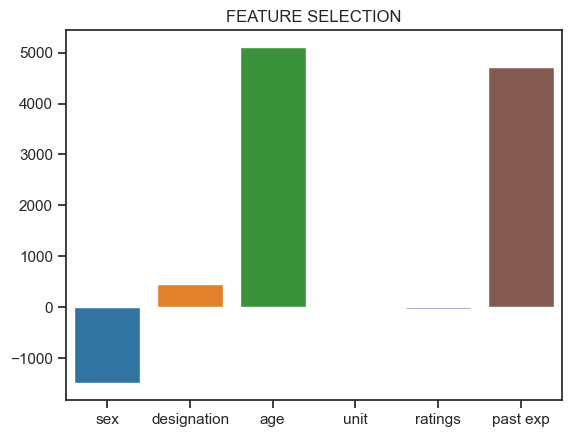

In [737]:
# feature selection using lasso coef_
names = model_data.drop('salary',axis=1).columns
model = Lasso(alpha = 100)
lasso_coef = model.fit(X_train,y_train).coef_
sns.barplot(x=names,y=lasso_coef)
plt.title('FEATURE SELECTION')
plt.show()

In [743]:
model_data.columns

Index(['sex', 'designation', 'age', 'unit', 'ratings', 'past exp', 'salary'], dtype='object')

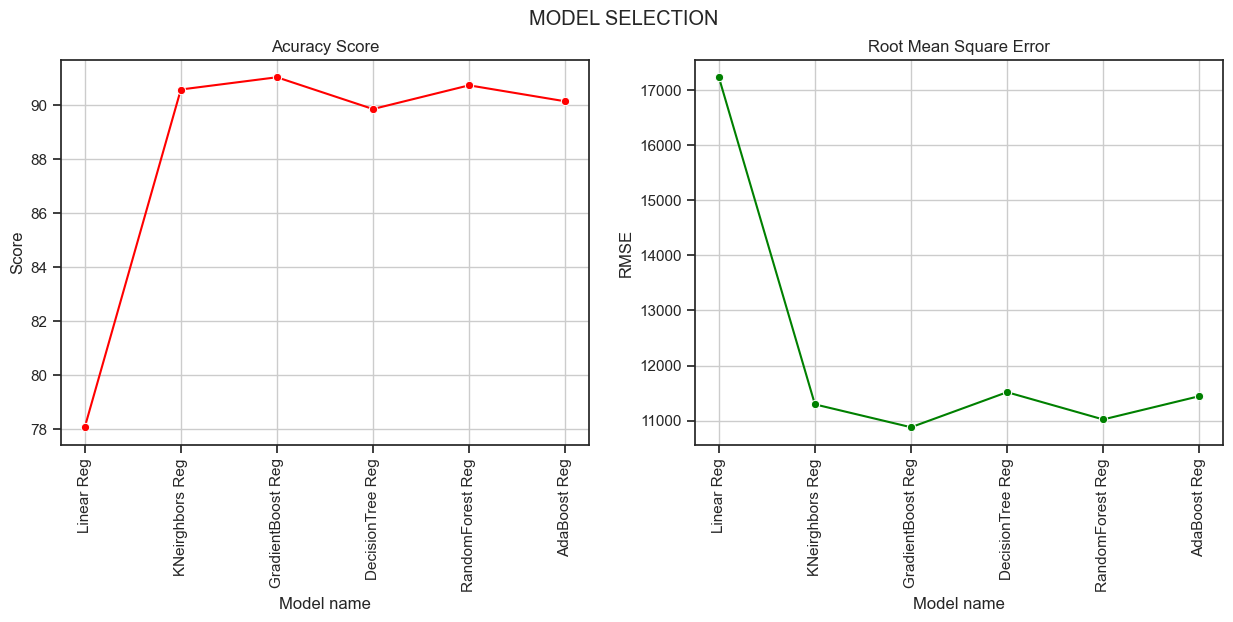

In [744]:
X = model_data[['age','past exp']].values
y = model_data['salary'].values

score_list = []
rmse_list = []

linear = LinearRegression()
score = cross_val_score(linear,X,y,cv=5)
cvs = cross_val_score(linear,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

knn_regressor = KNeighborsRegressor(n_neighbors=6)  # You can adjust the number of neighbors
score = cross_val_score(knn_regressor,X,y,cv=5)
cvs = cross_val_score(knn_regressor,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15, max_depth=3, random_state=42)
score = cross_val_score(gradient,X,y,cv=5)
cvs = cross_val_score(gradient,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

decision = DecisionTreeRegressor()
score = cross_val_score(decision,X,y,cv=5)
cvs = cross_val_score(decision,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

random = RandomForestRegressor(n_estimators=100, random_state=42)
score = cross_val_score(random,X,y,cv=5)
cvs = cross_val_score(random,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

ada_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
score = cross_val_score(ada_regressor,X,y,cv=5)
cvs = cross_val_score(ada_regressor,X,y,cv=5,scoring='neg_mean_squared_error')
score_list.append(np.mean(score))
rmse_list.append(np.sqrt(np.mean(-cvs)))

score_list = np.array(score_list)
score_list = score_list * 100
score_list = list(score_list)

my_dict = {'Model name':['Linear Reg','KNeirghbors Reg','GradientBoost Reg','DecisionTree Reg','RandomForest Reg','AdaBoost Reg'],
          'Score':score_list,
          'RMSE':rmse_list}
model_selection = pd.DataFrame(my_dict)

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.lineplot(x=model_selection['Model name'],y=model_selection['Score'],marker='o',color='red',ax=ax0)
ax0.set(title='Acuracy Score')
ax0.set_xticks(ax0.get_xticks())
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax0.grid(True)
sns.lineplot(x=model_selection['Model name'],y=model_selection['RMSE'],marker='o',color='green',ax=ax1)
ax1.set(title='Root Mean Square Error')
ax1.set_xticks(ax0.get_xticks())
ax1.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax1.grid(True)
plt.suptitle('MODEL SELECTION')
plt.show()

In [745]:
# model training

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=76)
scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
scaling_array = X_train[:,1].reshape(-1,1)
scaled_array = scaler.fit_transform(scaling_array)
X_train[:, 1] = scaled_array.flatten()

scaling_array = X_test[:,1].reshape(-1,1)
scaled_array = scaler.transform(scaling_array)
X_test[:, 1] = scaled_array.flatten()

ada_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=.9, random_state=35)
ada_regressor.fit(X_train,y_train)
prediction = ada_regressor.predict(X_test)

# model evaluation
accuracy = ada_regressor.score(X_test,y_test)
mse = mean_squared_error(prediction,y_test)
rmse = mean_squared_error(prediction,y_test,squared=False)

print(f'ACCURACY OF THE MODEL ->                  {round(accuracy * 100,2)}')
print(f'ROOT MEAN SQUARED ERROR OF THE MODEL ->   {round(rmse,2)}')

ACCURACY OF THE MODEL ->                  93.51
ROOT MEAN SQUARED ERROR OF THE MODEL ->   10438.86


In [763]:
# pickle model
with open('train_model.pkl','wb') as file:
    pickle.dump(ada_regressor,file)

In [770]:
# testing
data = pd.read_csv('salary.csv')
sample = data.groupby('DESIGNATION').sample(n=6,random_state=212)
test = sample[['AGE','PAST EXP']]
df = data[['FIRST NAME','LAST NAME','SEX','DESIGNATION','AGE','UNIT','RATINGS','PAST EXP']]
df_sample = df.groupby('DESIGNATION').sample(n=6,random_state=212)
test = test.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
test.columns = test.columns.str.lower()
test = test.values
prediction = ada_regressor.predict(test)
# df_sample['Predicted Salary'] = prediction
# df_sample
df_sample.to_csv('sample_data.csv',index=False)

In [769]:
df_sample['Predicted Salary'] = prediction
df_sample

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,UNIT,RATINGS,PAST EXP,SALARY,Predicted Salary
1397,ROWENA,ARAUJO,F,Analyst,24.0,Management,4.0,0,47774,45934.694231
467,RANDI,ANON,F,Analyst,21.0,Finance,5.0,0,49497,45934.694231
552,DARYL,ACKERSON,M,Analyst,24.0,Marketing,5.0,2,46891,45934.694231
1229,BENNIE,ADDUCI,M,Analyst,24.0,Management,3.0,1,42662,45934.694231
177,EMMA,ALTSISI,F,Analyst,25.0,Finance,2.0,1,40251,45934.694231
1794,SANDI,ARIMOTO,F,Analyst,23.0,Web,3.0,0,48934,45934.694231
1433,PAT,ADY,M,Associate,29.0,Operations,4.0,3,93279,93204.627119
2582,GRETA,ANSLINGER,F,Associate,30.0,Web,2.0,5,96322,93204.627119
1880,SHELBY,AIAVA,M,Associate,29.0,Management,4.0,2,72237,93204.627119
1782,CURTIS,ABELLERA,M,Associate,30.0,Operations,3.0,7,94026,93204.627119
